In [9]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
summary_writer = tf.summary.create_file_writer('lab7-logs-summary')

In [11]:
# 在0~2π之間產生100個點
x = np.linspace(0, 2 * np.pi , 100)
# 將100個點帶入sin函數中
data = np.sin(x)
with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔
    for i, y in enumerate(data):
        tf.summary.scalar('sin', y, step=i)  # 存入數值(y為數值，i為時間軸)

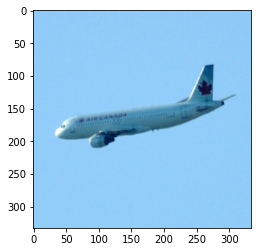

In [15]:
def read_img(file):
    image_string = tf.io.read_file(file)  # 讀取檔案
    # 將讀入檔案以影像格式來解碼
    image_decode = tf.image.decode_image(image_string)
    # 將影像增加一個維度(number,height,width,channel)方便之後存入紀錄檔中
    # image_decode = tf.expand_dims(image_decode, axis=0)
    return image_decode

img = read_img('image/airplane.png')  # 讀入影像資訊
plt.imshow(img)  # 顯示讀入的影像資訊

In [11]:
image_string = tf.io.read_file('image/airplane.png')  # 讀取檔案
image_decode = tf.image.decode_image(image_string)

In [12]:
with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔
    tf.summary.image("Airplane", [image_decode], step=0)  # 存入影像資訊

In [18]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:00:34 ago. (Use '!kill 24428' to kill it.)

In [29]:
!dir image

 Volume in drive C is OS
 Volume Serial Number is B60A-EA8A

 Directory of C:\Users\asus\tf2-gpu\Scripts\image

2021/09/10  14:52    <DIR>          .
2021/09/10  14:52    <DIR>          ..
2019/04/11  12:49           110,958 airplane.png
2019/04/11  12:49           107,339 airplane_color.png
2019/07/08  20:02           110,809 airplane_flip.png
2019/04/11  12:49           119,134 airplane_rot.png
2019/04/11  12:49           100,540 airplane_zoom.png
2019/04/30  13:45         4,783,815 elephant.jpg
               6 File(s)      5,332,595 bytes
               2 Dir(s)  87,149,101,056 bytes free


In [30]:
img_files = ['airplane_zoom.png', 'airplane_flip.png', 'airplane_color.png', 'airplane_rot.png',
             'airplane.png']  # 創建一個陣列用來儲存讀入的影像 

imgs = [] 

for file in img_files: 
    imgs.append(read_img('image/'+file))  # 讀取影像並存入陣列中 

with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔 
    # 一次存入五張影像(注意:如果max_outputs沒設定為5，就只會儲存3張影像) 
    tf.summary.image("Airplane Augmentation", imgs, max_outputs=5, step=0) 

In [19]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:00:56 ago. (Use '!kill 24428' to kill it.)

In [32]:
with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔
    # 每次儲存一張影像，並儲存在不同Step中
    for i, img in enumerate(imgs):
        tf.summary.image("Save image each step", [img], step=i)

In [20]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:01:57 ago. (Use '!kill 24428' to kill it.)

In [34]:
# 建立一個陣列，裡面包含了對話記錄
texts = ["小明：Cubee小助理最近好想學深度學習的技術哦!", 
         "Cubee：這是當然的阿，這可現今最火的技術呢!", 
         "小明：那我該如何入門呢?", 
         "Cubee：推薦你一本書「輕鬆學會Google TensorFlow2.0深度學習」。", 
         "小明：這本書沒有深度學習經驗的人也能學會嗎?", 
         "Cubee：這是當然的，你只需要基礎Python能力就可以學會了!", 
         "小明：太好了那我要趕快去買了!"]

with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔
    # 將每一段字串資訊以不同Step存入到記錄檔中
    for i, text in enumerate(texts):
        tf.summary.text("Chat record", text, step=i)

In [21]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:02:51 ago. (Use '!kill 24428' to kill it.)

In [36]:
# 建立讀取音訊的函數
def read_audio(file):
    audio_string = tf.io.read_file(file)  # 讀取檔案
    # 將讀入檔案以音訊格式來解碼
    audio, fs = tf.audio.decode_wav(audio_string)
    # 因為tf.summary.audio要求輸入格式為[k(clips), t(frames), c(channels)]
    # 而解碼後的音訊只有[t(frames), c(channels)]，所以需要增加一個維度給音訊
    audio = tf.expand_dims(audio, axis=0)
    return audio, fs

audio, fs = read_audio('./audio/cat.wav')  # 讀取音訊檔

with summary_writer.as_default():  # summary_writer作為預設寫入的紀錄檔
    tf.summary.audio('cat', audio, fs, step=0)  # 存入音訊資訊

In [23]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:03:12 ago. (Use '!kill 24428' to kill it.)

In [38]:
data = tf.random.normal([64, 100], dtype=tf.float64)
with summary_writer.as_default():
    tf.summary.histogram('Normal distribution', data, step=0)

In [24]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:03:18 ago. (Use '!kill 24428' to kill it.)

In [40]:
with summary_writer.as_default():
    for i, offset in enumerate(tf.range(0, 10, delta=0.1, dtype=tf.float64)):
        tf.summary.histogram('Normal distribution 2', data+offset, step=i)

In [25]:
%tensorboard --port 9101 --logdir lab7-logs-summary

Reusing TensorBoard on port 9101 (pid 24428), started 0:04:14 ago. (Use '!kill 24428' to kill it.)

In [2]:
import os
import io
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from preprocessing import parse_aug_fn, parse_fn

In [43]:
y_true = [2, 1, 0, 2, 2, 0, 1, 1]
y_pred = [0, 1, 0, 2, 2, 0, 2, 1]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy()
print(cm)

[[2 0 0]
 [0 2 1]
 [1 0 2]]


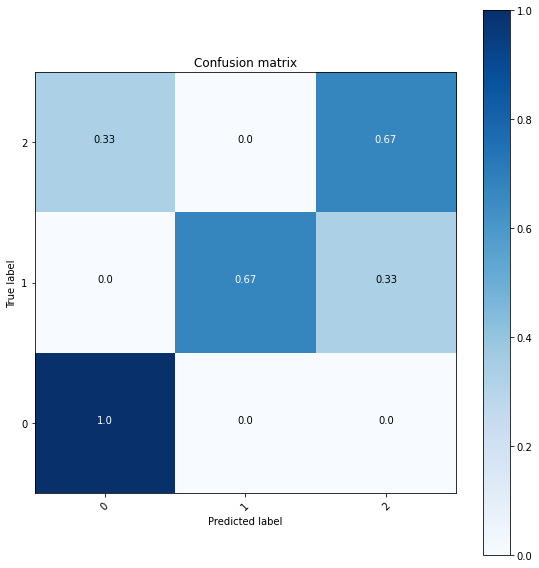

In [44]:
def plot_confusion_matrix(cm, class_names):
    """
    產生一張圖表示的Confusion matrix
    
    Args:
    cm (shape = [n, n]): 傳入Confusion matrix
    class_names (shape = [n]): 傳入類別
    """
    # 標準化confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    tick_index = np.arange(len(class_names))
    # matplotlib 3.1.1 bug，如果不設定ylim在[-0.5~2.5]，圖片y軸範圍會被縮小成[0~2]
    plt.ylim([-0.5, 2.5])
    # Y軸顯示類別名稱
    plt.yticks(tick_index, class_names)
    # X軸顯示類別名稱，並將類別名稱旋轉45度(避免文字重疊)
    plt.xticks(tick_index, class_names, rotation=45)
    # 再圖片右邊產生一條顏色刻度條
    plt.colorbar()

    # 在每一格Confusion matrix輸入預測百分比
    threshold = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # 如果格內背景顏色太深使用白色文字顯示，反之使用黑色文字
            color = "white" if cm[i, j] > threshold else "black"
            plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)
            
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # 將圖片的位置進行調整，避免x或y軸的文字被遮擋
    plt.tight_layout()
    return figure

# Example
img = plot_confusion_matrix(cm, [0, 1, 2])

In [45]:
def plot_to_image(figure):
    """將Matplotlib plot的圖片轉TensorFlow的張量格式"""
    # 將Matplotlib plot的圖片以PNG的格式儲存到記憶體中
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    # 關閉plt圖片，防止圖片直接顯示在Jupyter notebook介面中
    plt.close(figure)
    buf.seek(0)
    # 將記憶體中的資料轉成TensorFlow格式
    image = tf.image.decode_png(buf.getvalue(), channels=4)
    image = tf.expand_dims(image, 0)
    return image

In [46]:
# Example
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=3).numpy()
img = plot_confusion_matrix(cm, [0, 1, 2])
img_show = plot_to_image(img)

In [47]:
class ConfusionMatrix(tf.keras.callbacks.Callback):
    def __init__(self, log_dir, test_data, class_name):
        super(ConfusionMatrix, self).__init__()
        self.log_dir = log_dir
        self.test_data = test_data
        self.class_names = class_name
        self.num_classes = len(class_name)

    def on_train_begin(self, logs=None):
        path = os.path.join(self.log_dir, 'confusion_matrix')
        # 創建TensorBoard紀錄檔
        self.writer = tf.summary.create_file_writer(path)

    def on_epoch_end(self, epoch, logs=None):
        # 計算Confusion matrix
        total_cm = np.zeros([10, 10])
        for x, y_true in self.test_data:
            y_pred = self.model.predict(x)
            y_pred = np.argmax(y_pred, axis=1)
            y_true = np.argmax(y_true, axis=1)
            cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=self.num_classes).numpy()
            total_cm += cm
        
        # 將Confusion matrix轉成Matplotlib圖片
        figure = plot_confusion_matrix(total_cm, class_names=self.class_names)
        # 將Matplotlib圖片轉成TensorFlow型式的圖片
        cm_image = plot_to_image(figure)

        # 將圖片紀錄在TensorBoard log中
        with self.writer.as_default():
            tf.summary.image("Confusion Matrix", cm_image, step=epoch)

In [48]:
train_split, valid_split = ['train[:90%]', 'train[90%:]']
# 取得訓練數據，並順便讀取data的資訊
train_data, info = tfds.load("cifar10", split=train_split, with_info=True)
# 取得驗證數據
valid_data = tfds.load("cifar10", split=valid_split)
# 取得測試數據
test_data = tfds.load("cifar10", split=tfds.Split.TEST)
# 取得CIFAR-10數據集的類別
class_name = info.features['label'].names

In [49]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

train_data = train_data.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [50]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(256, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          7379

In [51]:
# 儲存訓練記錄檔
logs_dirs = 'lab7-logs-images'
model_cbk = keras.callbacks.TensorBoard(logs_dirs)
# 儲存Confusion matrix圖片
save_cm = ConfusionMatrix(logs_dirs, test_data, class_name)

In [52]:
model_1.compile(keras.optimizers.Adam(), 
                loss=keras.losses.CategoricalCrossentropy(from_logits=True), 
                metrics=[keras.metrics.CategoricalAccuracy()])

In [53]:
model_1.fit(train_data,
            epochs=100, 
            validation_data=valid_data,
            callbacks=[model_cbk, save_cm])

Epoch 1/100
  3/704 [..............................] - ETA: 44s - loss: 2.3356 - categorical_accuracy: 0.1250    WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0128s vs `on_train_batch_end` time: 0.0184s). Check your callbacks.


704/704 [==============================] - 14s 10ms/step - loss: 2.0667 - categorical_accuracy: 0.2163 - val_loss: 1.6858 - val_categorical_accuracy: 0.3824
Epoch 2/100
704/704 [==============================] - 7s 9ms/step - loss: 1.8259 - categorical_accuracy: 0.3284 - val_loss: 1.5081 - val_categorical_accuracy: 0.4660
Epoch 3/100
704/704 [==============================] - 7s 9ms/step - loss: 1.7040 - categorical_accuracy: 0.3812 - val_loss: 1.3949 - val_categorical_accuracy: 0.4872
Epoch 4/100
704/704 [==============================] - 7s 9ms/step - loss: 1.6177 - categorical_accuracy: 0.4151 - val_loss: 1.2701 - val_categorical_accuracy: 0.5424
Epoch 5/100
704/704 [==============================] - 6s 9ms/step - loss: 1.5548 - categorical_accuracy: 0.4446 - val_loss: 1.2237 - val_categorical_accuracy: 0.5570
Epoch 6/100
704/704 [==============================] - 6s 9ms/step - loss: 1.4962 - categorical_accuracy: 0.4686 - val_loss: 1.1502 - val_categorical_accuracy: 0.5900
Epoch 7/

Epoch 50/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8986 - categorical_accuracy: 0.6988 - val_loss: 0.6481 - val_categorical_accuracy: 0.7834
Epoch 51/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8881 - categorical_accuracy: 0.7009 - val_loss: 0.6657 - val_categorical_accuracy: 0.7696
Epoch 52/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8891 - categorical_accuracy: 0.7014 - val_loss: 0.6417 - val_categorical_accuracy: 0.7820
Epoch 53/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8827 - categorical_accuracy: 0.7039 - val_loss: 0.6359 - val_categorical_accuracy: 0.7846
Epoch 54/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8797 - categorical_accuracy: 0.7069 - val_loss: 0.6677 - val_categorical_accuracy: 0.7808
Epoch 55/100
704/704 [==============================] - 6s 9ms/step - loss: 0.8722 - categorical_accuracy: 0.7086 - val_loss: 0.6577 - val_categorical_accuracy:

In [28]:
%load_ext tensorboard
%tensorboard --port 9102 --logdir lab7-logs-images

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [1]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
# 從資料夾中的preprocessing.py檔案中Import parse_aug_fn和parse_fn函數
from preprocessing import parse_aug_fn, parse_fn

In [2]:
from tensorboard.plugins.hparams import api as hp

In [3]:
hparam_ia = hp.HParam('Imgae_Augmentation', hp.Discrete([False, True]))
hparam_bn = hp.HParam('Batch_Normalization', hp.Discrete([False, True]))
hparam_init = hp.HParam('Weight_Initialization', hp.Discrete(['RandomNormal_0.01std', 'glorot_normal', 'he_normal']))
hparam_lr = hp.HParam('Learning_Rate', hp.Discrete([0.001, 0.01, 0.03]))

In [4]:
metric = 'Accuracy'
log_dirs = "lab7-logs-hparams/hparam_tuning"
with tf.summary.create_file_writer(log_dirs).as_default():
    hp.hparams_config(
        hparams=[hparam_ia, hparam_bn, hparam_init, hparam_lr],
        metrics=[hp.Metric(metric, display_name='Accuracy')],
    )

In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
batch_size = 64  # 批次大小
# 將train Data重新分成1:9等分，分別分給valid data, train data
train_split, valid_split = ['train[:90%]', 'train[90%:]']

# 取得訓練數據
train_data_noaug, info = tfds.load("cifar10", split=train_split, with_info=True)
train_data_aug = tfds.load("cifar10", split=train_split)
# 取得驗證數據
valid_data = tfds.load("cifar10", split=valid_split)

train_num = int(info.splits['train'].num_examples / 5) * 4  # 訓練資料數量

train_data_noaug = train_data_noaug.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
train_data_noaug = train_data_noaug.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data_noaug = train_data_noaug.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

train_data_aug = train_data_aug.shuffle(train_num)  # 打散資料集
# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
train_data_aug = train_data_aug.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
train_data_aug = train_data_aug.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# 載入預處理「 parse_fn」function，cpu數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [6]:
class HyperparameterCallback(tf.keras.callbacks.Callback):
    # 類別創建時調用
    def __init__(self, log_dir, hparams):
        super(HyperparameterCallback, self).__init__()
        self.log_dir = log_dir
        self.hparams = hparams
        self.best_accuracy = 0
        self.writer = None
        
    # 訓練開始前調用
    def on_train_begin(self, logs=None):
        self.writer = tf.summary.create_file_writer(self.log_dir)

    # 每一個Epcoh結束後調用
    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('val_categorical_accuracy')
        if current_accuracy > self.best_accuracy:
            self.best_accuracy = current_accuracy
            
    # 訓練結束時調用
    def on_train_end(self, logs=None):
        with self.writer.as_default():
            hp.hparams(self.hparams)  # record the values used in this trial
            tf.summary.scalar(metric, self.best_accuracy, step=0)

In [7]:
def train_test_model(logs_dir, hparams):
    """
    logs_dir:傳入目前執行的任務log檔的位置
    hparams:傳入超參數
    """
    # 指派網路模型初始化的方法
    if hparams[hparam_init] == "glorot_normal":
        init = keras.initializers.glorot_normal()
    elif hparams[hparam_init] == "he_normal":
        init = keras.initializers.he_normal()
    else:
        init = keras.initializers.RandomNormal(0, 0.01)

    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(64, (3, 3), kernel_initializer=init)(inputs)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPool2D()(x)
    x = layers.Conv2D(128, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(256, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(128, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(64, (3, 3), kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, kernel_initializer=init)(x)
    if hparams[hparam_bn]: x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    # 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
    model = keras.Model(inputs, outputs, name='model')

    # 儲存訓練記錄檔
    model_tb = keras.callbacks.TensorBoard(log_dir=logs_dir, write_graph=False)

    # 儲存最好的網路模型權重
    model_mckp = keras.callbacks.ModelCheckpoint(logs_dir +'/best-model.hdf5', 
                                                 monitor='val_categorical_accuracy', 
                                                 save_best_only=True, 
                                                 mode='max')
    
    # 設定停止訓練的條件(當Accuracy超過30迭代沒有上升的話訓練會終止)
    model_els = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy' , 
                                              min_delta=0, 
                                              patience=30, 
                                              mode='max')
    # 客自化超參數回調函式，紀錄訓練模型的超參數和指標(準確率)
    model_hparam = HyperparameterCallback(logs_dir + 'hparam_tuning', hparams)


    # 設定訓練使用的優化器、損失函數和指標函數
    # 優化器學習率為超參數：0.001、0.01或0.03
    model.compile(keras.optimizers.Adam(hparams[hparam_lr]), 
                  loss=keras.losses.CategoricalCrossentropy(), 
                  metrics=[keras.metrics.CategoricalAccuracy()])
    
    # 超參數：使用「經過影像增強的數據」或「不經過影像增強的數據」訓練網路
    if hparams[hparam_ia]:
        history = model.fit(train_data_aug,
                            epochs=2, 
                            validation_data=valid_data,
                            callbacks=[model_tb, model_mckp, model_els, model_hparam])
    else:
        history = model.fit(train_data_noaug,
                            epochs=2, 
                            validation_data=valid_data,
                            callbacks=[model_tb, model_mckp, model_els, model_hparam])

In [8]:
session_id = 1  # 訓練任務的id
for ia in hparam_ia.domain.values:
    for bn in hparam_bn.domain.values:
        for init in hparam_init.domain.values:
            for lr in hparam_lr.domain.values:
                # 顯示目前訓練任務id
                print('--- Running training session {}'.format(session_id))
                # 設定本次訓練的超參數
                hparams = {hparam_ia: ia, hparam_bn: bn, hparam_init: init, hparam_lr: lr}
                # 儲放紀錄檔的位置
                logs_dir = os.path.join("lab7-logs-hparams", "run-{}".format(session_id))
                # 建立、編譯及訓練網路模型
                train_test_model(logs_dir, hparams)
                session_id += 1  # id+1

--- Running training session 1
Epoch 1/2
  3/704 [..............................] - ETA: 26s - loss: 2.3023 - categorical_accuracy: 0.0885  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0109s). Check your callbacks.


704/704 [==============================] - 10s 9ms/step - loss: 2.0929 - categorical_accuracy: 0.1877 - val_loss: 1.9060 - val_categorical_accuracy: 0.2736
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 1.9143 - categorical_accuracy: 0.2564 - val_loss: 1.7964 - val_categorical_accuracy: 0.3142
--- Running training session 2
Epoch 1/2
  3/704 [..............................] - ETA: 33s - loss: 2.4417 - categorical_accuracy: 0.0781 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0059s vs `on_train_batch_end` time: 0.0145s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 2.3046 - categorical_accuracy: 0.0984 - val_loss: 2.3048 - val_categorical_accuracy: 0.0984
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 2.3038 - categorical_accuracy: 0.1002 - val_loss: 2.3035 - val_categorical_accuracy: 0.0994
--- Running training session 3
Epoch 1/2
  3/704 [..............................] - ETA: 29s - loss: 26.7099 - categorical_accuracy: 0.1094WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0056s vs `on_train_batch_end` time: 0.0129s). Check your callbacks.


704/704 [==============================] - 6s 9ms/step - loss: 2.4100 - categorical_accuracy: 0.1004 - val_loss: 2.3064 - val_categorical_accuracy: 0.0956
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 2.3056 - categorical_accuracy: 0.0965 - val_loss: 2.3061 - val_categorical_accuracy: 0.0948
--- Running training session 4
Epoch 1/2
  3/704 [..............................] - ETA: 30s - loss: 2.3120 - categorical_accuracy: 0.0938 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0055s vs `on_train_batch_end` time: 0.0136s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 1.8785 - categorical_accuracy: 0.2892 - val_loss: 1.5230 - val_categorical_accuracy: 0.4544
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 1.5245 - categorical_accuracy: 0.4458 - val_loss: 1.2907 - val_categorical_accuracy: 0.5318
--- Running training session 5
Epoch 1/2
  3/704 [..............................] - ETA: 35s - loss: 61.3978 - categorical_accuracy: 0.0885WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0064s vs `on_train_batch_end` time: 0.0155s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 2.5571 - categorical_accuracy: 0.0988 - val_loss: 2.3052 - val_categorical_accuracy: 0.0956
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.3034 - categorical_accuracy: 0.0995 - val_loss: 2.3040 - val_categorical_accuracy: 0.0940
--- Running training session 6
Epoch 1/2
  3/704 [..............................] - ETA: 35s - loss: 29055.4902 - categorical_accuracy: 0.0677WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0057s vs `on_train_batch_end` time: 0.0161s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 136.9859 - categorical_accuracy: 0.0992 - val_loss: 2.3040 - val_categorical_accuracy: 0.0994
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 2.3052 - categorical_accuracy: 0.0987 - val_loss: 2.3033 - val_categorical_accuracy: 0.1006
--- Running training session 7
Epoch 1/2
  3/704 [..............................] - ETA: 30s - loss: 2.5560 - categorical_accuracy: 0.1094 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0057s vs `on_train_batch_end` time: 0.0134s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 1.7914 - categorical_accuracy: 0.3380 - val_loss: 1.3683 - val_categorical_accuracy: 0.5006
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 1.4111 - categorical_accuracy: 0.4907 - val_loss: 1.1858 - val_categorical_accuracy: 0.5742
--- Running training session 8
Epoch 1/2
  3/704 [..............................] - ETA: 31s - loss: 318.8794 - categorical_accuracy: 0.0677WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0053s vs `on_train_batch_end` time: 0.0139s). Check your callbacks.


704/704 [==============================] - 6s 9ms/step - loss: 3.6709 - categorical_accuracy: 0.0957 - val_loss: 2.3043 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 2.3034 - categorical_accuracy: 0.1023 - val_loss: 2.3062 - val_categorical_accuracy: 0.0948
--- Running training session 9
Epoch 1/2
  3/704 [..............................] - ETA: 33s - loss: 42874.4766 - categorical_accuracy: 0.1250WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0064s vs `on_train_batch_end` time: 0.0146s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 186.4874 - categorical_accuracy: 0.1003 - val_loss: 2.3042 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 6s 8ms/step - loss: 2.3052 - categorical_accuracy: 0.1015 - val_loss: 2.3048 - val_categorical_accuracy: 0.0956
--- Running training session 10
Epoch 1/2
  3/704 [..............................] - ETA: 43s - loss: 2.8344 - categorical_accuracy: 0.1302 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0197s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.6074 - categorical_accuracy: 0.4256 - val_loss: 1.3395 - val_categorical_accuracy: 0.5214
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.1895 - categorical_accuracy: 0.5870 - val_loss: 1.2386 - val_categorical_accuracy: 0.5470
--- Running training session 11
Epoch 1/2
  3/704 [..............................] - ETA: 43s - loss: 2.8719 - categorical_accuracy: 0.0990 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0066s vs `on_train_batch_end` time: 0.0194s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.6358 - categorical_accuracy: 0.3999 - val_loss: 2.3145 - val_categorical_accuracy: 0.3198
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.2889 - categorical_accuracy: 0.5410 - val_loss: 1.7481 - val_categorical_accuracy: 0.4012
--- Running training session 12
Epoch 1/2
  3/704 [..............................] - ETA: 46s - loss: 2.9487 - categorical_accuracy: 0.1042 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0075s vs `on_train_batch_end` time: 0.0201s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.7067 - categorical_accuracy: 0.3678 - val_loss: 3.6121 - val_categorical_accuracy: 0.2022
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.4006 - categorical_accuracy: 0.4959 - val_loss: 2.2773 - val_categorical_accuracy: 0.3848
--- Running training session 13
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 3.0101 - categorical_accuracy: 0.1042 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0081s vs `on_train_batch_end` time: 0.0198s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.5429 - categorical_accuracy: 0.4513 - val_loss: 1.3580 - val_categorical_accuracy: 0.5378
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.0976 - categorical_accuracy: 0.6181 - val_loss: 1.1573 - val_categorical_accuracy: 0.5972
--- Running training session 14
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 2.8498 - categorical_accuracy: 0.1198  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0198s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.6046 - categorical_accuracy: 0.4134 - val_loss: 2.3046 - val_categorical_accuracy: 0.3048
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.2427 - categorical_accuracy: 0.5611 - val_loss: 2.1624 - val_categorical_accuracy: 0.3824
--- Running training session 15
Epoch 1/2
  3/704 [..............................] - ETA: 43s - loss: 2.9736 - categorical_accuracy: 0.0885 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0082s vs `on_train_batch_end` time: 0.0193s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.7218 - categorical_accuracy: 0.3689 - val_loss: 1.6802 - val_categorical_accuracy: 0.4442
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.4052 - categorical_accuracy: 0.4940 - val_loss: 2.1822 - val_categorical_accuracy: 0.3570
--- Running training session 16
Epoch 1/2
  3/704 [..............................] - ETA: 42s - loss: 2.7786 - categorical_accuracy: 0.1198 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0072s vs `on_train_batch_end` time: 0.0187s). Check your callbacks.


704/704 [==============================] - 8s 11ms/step - loss: 1.4891 - categorical_accuracy: 0.4750 - val_loss: 1.5126 - val_categorical_accuracy: 0.5082
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.0660 - categorical_accuracy: 0.6336 - val_loss: 0.9504 - val_categorical_accuracy: 0.6626077 - ETA: 0s - loss: 1.0690 - categorical_accuracy
--- Running training session 17
Epoch 1/2
  3/704 [..............................] - ETA: 50s - loss: 2.8625 - categorical_accuracy: 0.1042 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0083s vs `on_train_batch_end` time: 0.0219s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.5749 - categorical_accuracy: 0.4236 - val_loss: 1.5076 - val_categorical_accuracy: 0.4568
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.2118 - categorical_accuracy: 0.5728 - val_loss: 1.5913 - val_categorical_accuracy: 0.4832
--- Running training session 18
Epoch 1/2
  3/704 [..............................] - ETA: 43s - loss: 2.8111 - categorical_accuracy: 0.1354 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0072s vs `on_train_batch_end` time: 0.0191s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.6732 - categorical_accuracy: 0.3823 - val_loss: 2.7317 - val_categorical_accuracy: 0.2802
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.3647 - categorical_accuracy: 0.5083 - val_loss: 2.2203 - val_categorical_accuracy: 0.3832
--- Running training session 19
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 2.3030 - categorical_accuracy: 0.1146  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0073s vs `on_train_batch_end` time: 0.0205s). Check your callbacks.


704/704 [==============================] - 8s 10ms/step - loss: 2.3028 - categorical_accuracy: 0.0970 - val_loss: 2.3028 - val_categorical_accuracy: 0.1000
Epoch 2/2
704/704 [==============================] - 7s 9ms/step - loss: 2.3027 - categorical_accuracy: 0.0996 - val_loss: 2.3028 - val_categorical_accuracy: 0.0948
--- Running training session 20
Epoch 1/2
  3/704 [..............................] - ETA: 35s - loss: 2.3244 - categorical_accuracy: 0.1198 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0064s vs `on_train_batch_end` time: 0.0151s). Check your callbacks.


704/704 [==============================] - 7s 10ms/step - loss: 2.8477 - categorical_accuracy: 0.0983 - val_loss: 2.3047 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 7s 10ms/step - loss: 2.3034 - categorical_accuracy: 0.1008 - val_loss: 2.3032 - val_categorical_accuracy: 0.0984
--- Running training session 21
Epoch 1/2
  3/704 [..............................] - ETA: 36s - loss: 59.7482 - categorical_accuracy: 0.1354WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0068s vs `on_train_batch_end` time: 0.0157s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 43.2904 - categorical_accuracy: 0.1008 - val_loss: 2.3057 - val_categorical_accuracy: 0.1094
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.3054 - categorical_accuracy: 0.1002 - val_loss: 2.3064 - val_categorical_accuracy: 0.0948
--- Running training session 22
Epoch 1/2
  3/704 [..............................] - ETA: 35s - loss: 2.3085 - categorical_accuracy: 0.1042 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0070s vs `on_train_batch_end` time: 0.0152s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 2.0790 - categorical_accuracy: 0.2060 - val_loss: 1.7814 - val_categorical_accuracy: 0.3250
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 1.8623 - categorical_accuracy: 0.3128 - val_loss: 1.5196 - val_categorical_accuracy: 0.4510
--- Running training session 23
Epoch 1/2
  3/704 [..............................] - ETA: 38s - loss: 74.3064 - categorical_accuracy: 0.0990WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0069s vs `on_train_batch_end` time: 0.0170s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 2.6114 - categorical_accuracy: 0.1007 - val_loss: 2.3039 - val_categorical_accuracy: 0.0948
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.3036 - categorical_accuracy: 0.1006 - val_loss: 2.3022 - val_categorical_accuracy: 0.1094
--- Running training session 24
Epoch 1/2
  3/704 [..............................] - ETA: 34s - loss: 51064.8438 - categorical_accuracy: 0.0833WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0067s vs `on_train_batch_end` time: 0.0147s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 220.1736 - categorical_accuracy: 0.1018 - val_loss: 2.3059 - val_categorical_accuracy: 0.0990
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.3055 - categorical_accuracy: 0.0973 - val_loss: 2.3050 - val_categorical_accuracy: 0.0984
--- Running training session 25
Epoch 1/2
  3/704 [..............................] - ETA: 39s - loss: 2.6549 - categorical_accuracy: 0.1094 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0066s vs `on_train_batch_end` time: 0.0175s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 2.2975 - categorical_accuracy: 0.1095 - val_loss: 2.2421 - val_categorical_accuracy: 0.1650
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.2275 - categorical_accuracy: 0.1474 - val_loss: 1.8367 - val_categorical_accuracy: 0.2804
--- Running training session 26
Epoch 1/2
  3/704 [..............................] - ETA: 35s - loss: 69.4242 - categorical_accuracy: 0.1198WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0064s vs `on_train_batch_end` time: 0.0154s). Check your callbacks.


704/704 [==============================] - 8s 10ms/step - loss: 2.6071 - categorical_accuracy: 0.0964 - val_loss: 2.3031 - val_categorical_accuracy: 0.0956
Epoch 2/2
704/704 [==============================] - 7s 9ms/step - loss: 2.3279 - categorical_accuracy: 0.1006 - val_loss: 2.3031 - val_categorical_accuracy: 0.0940
--- Running training session 27
Epoch 1/2
  3/704 [..............................] - ETA: 37s - loss: 18312.2598 - categorical_accuracy: 0.0938WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0070s vs `on_train_batch_end` time: 0.0162s). Check your callbacks.


704/704 [==============================] - 7s 9ms/step - loss: 81.2568 - categorical_accuracy: 0.1000 - val_loss: 2.3037 - val_categorical_accuracy: 0.1088
Epoch 2/2
704/704 [==============================] - 6s 9ms/step - loss: 2.3052 - categorical_accuracy: 0.1007 - val_loss: 2.3078 - val_categorical_accuracy: 0.0984
--- Running training session 28
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 2.8444 - categorical_accuracy: 0.0938 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0079s vs `on_train_batch_end` time: 0.0200s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.9327 - categorical_accuracy: 0.3011 - val_loss: 1.8582 - val_categorical_accuracy: 0.3808
Epoch 2/2
704/704 [==============================] - 8s 12ms/step - loss: 1.6137 - categorical_accuracy: 0.4230 - val_loss: 1.6088 - val_categorical_accuracy: 0.4258
--- Running training session 29
Epoch 1/2
  3/704 [..............................] - ETA: 53s - loss: 2.8268 - categorical_accuracy: 0.1198 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0085s vs `on_train_batch_end` time: 0.0232s). Check your callbacks.


704/704 [==============================] - 10s 13ms/step - loss: 1.9274 - categorical_accuracy: 0.2884 - val_loss: 3.1693 - val_categorical_accuracy: 0.2008
Epoch 2/2
704/704 [==============================] - 8s 12ms/step - loss: 1.7095 - categorical_accuracy: 0.3767 - val_loss: 1.7830 - val_categorical_accuracy: 0.3736
--- Running training session 30
Epoch 1/2
  3/704 [..............................] - ETA: 48s - loss: 2.9095 - categorical_accuracy: 0.1458  WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0081s vs `on_train_batch_end` time: 0.0216s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.9808 - categorical_accuracy: 0.2646 - val_loss: 1.8605 - val_categorical_accuracy: 0.2974
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.8093 - categorical_accuracy: 0.3289 - val_loss: 1.5261 - val_categorical_accuracy: 0.4410
--- Running training session 31
Epoch 1/2
  3/704 [..............................] - ETA: 51s - loss: 3.0054 - categorical_accuracy: 0.1510 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0232s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.9047 - categorical_accuracy: 0.3169 - val_loss: 1.4907 - val_categorical_accuracy: 0.4600
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.5640 - categorical_accuracy: 0.4439 - val_loss: 2.4984 - val_categorical_accuracy: 0.3114
--- Running training session 32
Epoch 1/2
  3/704 [..............................] - ETA: 46s - loss: 2.8355 - categorical_accuracy: 0.0938 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0084s vs `on_train_batch_end` time: 0.0203s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.8955 - categorical_accuracy: 0.3050 - val_loss: 1.8532 - val_categorical_accuracy: 0.3350
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.6595 - categorical_accuracy: 0.4014 - val_loss: 2.5077 - val_categorical_accuracy: 0.2886
--- Running training session 33
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 2.8979 - categorical_accuracy: 0.0938 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0077s vs `on_train_batch_end` time: 0.0202s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.9814 - categorical_accuracy: 0.2635 - val_loss: 3.0628 - val_categorical_accuracy: 0.1658
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.8206 - categorical_accuracy: 0.3228 - val_loss: 1.6770 - val_categorical_accuracy: 0.3858
--- Running training session 34
Epoch 1/2
  3/704 [..............................] - ETA: 2:08 - loss: 2.9215 - categorical_accuracy: 0.1094 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0082s vs `on_train_batch_end` time: 0.0596s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.8601 - categorical_accuracy: 0.3330 - val_loss: 1.4936 - val_categorical_accuracy: 0.4516
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.4885 - categorical_accuracy: 0.4750 - val_loss: 1.3187 - val_categorical_accuracy: 0.5374
--- Running training session 35
Epoch 1/2
  3/704 [..............................] - ETA: 45s - loss: 2.9841 - categorical_accuracy: 0.1042 WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0078s vs `on_train_batch_end` time: 0.0203s). Check your callbacks.


704/704 [==============================] - 9s 11ms/step - loss: 1.8652 - categorical_accuracy: 0.3194 - val_loss: 2.8091 - val_categorical_accuracy: 0.3026
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.5932 - categorical_accuracy: 0.4256 - val_loss: 1.5050 - val_categorical_accuracy: 0.4764
--- Running training session 36
Epoch 1/2
  3/704 [..............................] - ETA: 1:22 - loss: 2.6612 - categorical_accuracy: 0.1198WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0080s vs `on_train_batch_end` time: 0.0380s). Check your callbacks.


704/704 [==============================] - 9s 12ms/step - loss: 1.9624 - categorical_accuracy: 0.2693 - val_loss: 2.0639 - val_categorical_accuracy: 0.2748
Epoch 2/2
704/704 [==============================] - 8s 11ms/step - loss: 1.7871 - categorical_accuracy: 0.3359 - val_loss: 2.5289 - val_categorical_accuracy: 0.2810


In [30]:
%load_ext tensorboard
%tensorboard --port 9103 --logdir lab7-logs-hparams

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
